In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [36]:
N = 64
L = 1.0
dx = L/N
xx, yy = np.meshgrid(np.arange(N), np.arange(N))
qxx, qyy = np.meshgrid(np.arange(-0.5,2.5,1), np.arange(-0.5,2.5,1))
qxx = qxx.ravel()
qyy = qyy.ravel()

In [37]:
b = 1./2./np.pi*np.log(dx*((xx-N//2)**2+(yy-N//2)**2)**0.5)
b -= b[0][0]

/home/lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [44]:
b[N//2,:N//2], phi.reshape(N,N)[N//2,:N//2]

(array([-0.0551589 , -0.06021186, -0.06543052, -0.07082612, -0.07641108,
        -0.08219917, -0.08820573, -0.0944479 , -0.10094492, -0.1077185 ,
        -0.11479321, -0.12219711, -0.1299623 , -0.13812588, -0.14673095,
        -0.15582799, -0.1654767 , -0.17574832, -0.18672888, -0.19852353,
        -0.21126272, -0.22511101, -0.2402801 , -0.25704875, -0.2757945 ,
        -0.29704668, -0.32158052, -0.3505979 , -0.3861123 , -0.43189832,
        -0.4964301 , -0.6067479 ]),
 array([-0.02762822, -0.02782299, -0.0284082 , -0.02938658, -0.03076273,
        -0.03254321, -0.0347367 , -0.03735419, -0.04040921, -0.04391814,
        -0.04790065, -0.05238017, -0.05738456, -0.06294694, -0.06910672,
        -0.07591101, -0.08341639, -0.0916913 , -0.10081924, -0.11090326,
        -0.12207209, -0.13448917, -0.1483659 , -0.16398204, -0.18171837,
        -0.20211186, -0.22595508, -0.25449186, -0.28984853, -0.33613231,
        -0.40272782, -0.51592485]))

In [19]:
# phi_test = np.zeros(N*N)
# for i in range(9):
#     phi_test += 1./2./np.pi*np.log(((xx.ravel()-qxx.ravel()[i])**2+(yy.ravel()-qyy[i])**2)**0.5)

# phi_test -= phi_test[0]
# phi_test[N//2+N*(N//2)] = 0.0

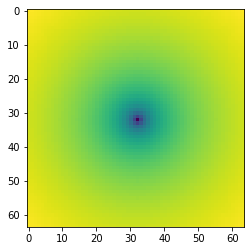

In [48]:
plt.imshow(b)

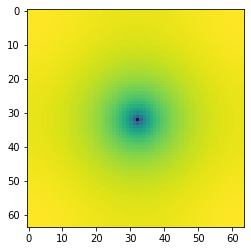

In [51]:
plt.imshow(phi.reshape(N,N))

In [21]:
def LAPLACIAN_JACOBI(phi_old, source, neighbor_r, neighbor_l, neighbor_u, neighbor_d, idx):
    return 0.25*(phi_old[neighbor_r[idx]]+phi_old[neighbor_l[idx]]+phi_old[neighbor_u[idx]]\
                 +phi_old[neighbor_d[idx]]-dx**2*source[idx])
    
def LAPLACIAN_GAUSS_SEIDEL(phi_old, source, neighbor_r, neighbor_l, neighbor_u, neighbor_d, idx_even, idx_odd):
    phi_old[idx_even] = 0.25*(phi_old[neighbor_r[idx_even]]+phi_old[neighbor_l[idx_even]]\
                              +phi_old[neighbor_u[idx_even]]+phi_old[neighbor_d[idx_even]]-dx**2*source[idx_even])
    phi_old[idx_odd] = 0.25*(phi_old[neighbor_r[idx_odd]]+phi_old[neighbor_l[idx_odd]]\
                             +phi_old[neighbor_u[idx_odd]]+phi_old[neighbor_d[idx_odd]]-dx**2*source[idx_odd])
    return phi_old

def LAPLACIAN_SUCCESSIVE_OVER_RELAXATION(phi_old, omega, source, neighbor_r, neighbor_l, neighbor_u, neighbor_d, idx_even, idx_odd):
    phi_old[idx_even] += 0.25*omega*(phi_old[neighbor_r[idx_even]]+phi_old[neighbor_l[idx_even]]+phi_old[neighbor_u[idx_even]]\
                                     +phi_old[neighbor_d[idx_even]]-dx**2*source[idx_even]-4.*phi_old[idx_even])
    phi_old[idx_odd] += 0.25*omega*(phi_old[neighbor_r[idx_odd]]+phi_old[neighbor_l[idx_odd]]+phi_old[neighbor_u[idx_odd]]\
                                     +phi_old[neighbor_d[idx_odd]]-dx**2*source[idx_odd]-4.*phi_old[idx_odd])
    return phi_old
    
def CALCULATE_CRITERIA(phi, source, neighbor_r, neighbor_l, neighbor_u, neighbor_d):
    diff = (1./dx**2*(phi[neighbor_r]+phi[neighbor_l]+phi[neighbor_u]+phi[neighbor_d]-4.*phi)-source)
    return (diff**2).mean()

In [38]:
L = 1.0
N = 64
dx = L/N
xx, yy = np.meshgrid(dx*np.arange(N), dx*np.arange(N))
rho = np.zeros((N,N))
rho[N//2, N//2] = 1./dx**2
kxx, kyy = np.meshgrid(np.arange(N), np.arange(N))
kxx = kxx[:,:N//2+1]
kyy = kyy[:,:N//2+1]

rho_k = np.fft.rfft2(rho)
rho_k[0,0] = 0.0
rho = np.fft.irfft2(rho_k)
phi_k = dx**2*rho_k/2./(np.cos(2.*np.pi*kxx/N)+np.cos(2.*np.pi*kyy/N)-2.)
phi_k[0,0] = 0.0
phi_analytic = np.fft.irfft2(phi_k)
phi_analytic -= phi_analytic[0,0]

phi = np.zeros(N*N)
rho = rho.ravel()

neighbor_r = np.arange(N*N)
neighbor_l = np.arange(N*N)
neighbor_u = np.arange(N*N)
neighbor_d = np.arange(N*N)
neighbor_r = N*(neighbor_r//N) + (neighbor_r%N+1)%N
neighbor_l = N*(neighbor_l//N) + (neighbor_l%N+N-1)%N
neighbor_u = N*((neighbor_u//N+1)%N) + neighbor_u%N
neighbor_d = N*((neighbor_d//N+N-1)%N) + neighbor_d%N

iteration = 0
iteration_max = 4000000
show_error_interval = 10000
# mode = 'jacobi'
# mode = 'gauss_seidel'
mode = 'SOR'

error = CALCULATE_CRITERIA(phi, rho, neighbor_r, neighbor_l, neighbor_u, neighbor_d)
# criteria = 100*CALCULATE_CRITERIA(phi_analytic.ravel(), rho, neighbor_r, neighbor_l, neighbor_u, neighbor_d)
criteria = 1e-20
error_cache = error
if mode=='jacobi':
    phi_copy = np.empty(N*N)
    idx = np.arange(1,N*N)
    flag = True
elif mode=='gauss_seidel' or mode=='SOR':
    idx_all = np.arange(1,N*N)
    idx_even = idx_all[idx_all%2==0]
    idx_odd = idx_all[idx_all%2==1]
    if mode == 'SOR':
        omega = 1.33
start = time.time()
while error>criteria and iteration<iteration_max:
    if mode=='jacobi':
        if flag:
            phi_copy[idx] = LAPLACIAN_JACOBI(phi, rho, neighbor_r, neighbor_l, neighbor_u, neighbor_d, idx)
            error = CALCULATE_CRITERIA(phi_copy, rho, neighbor_r, neighbor_l, neighbor_u, neighbor_d)
        else:
            phi[idx]  = LAPLACIAN_JACOBI(phi, rho, neighbor_r, neighbor_l, neighbor_u, neighbor_d, idx)
            error = CALCULATE_CRITERIA(phi, rho, neighbor_r, neighbor_l, neighbor_u, neighbor_d)
        flag = not flag
    elif mode=='gauss_seidel':
        phi = LAPLACIAN_GAUSS_SEIDEL(phi, rho, neighbor_r, neighbor_l, neighbor_u, neighbor_d, idx_even, idx_odd)
        error = CALCULATE_CRITERIA(phi, rho, neighbor_r, neighbor_l, neighbor_u, neighbor_d)
    else:
        phi = LAPLACIAN_SUCCESSIVE_OVER_RELAXATION(phi, omega, rho, neighbor_r, neighbor_l, neighbor_u, neighbor_d, idx_even, idx_odd)
        error = CALCULATE_CRITERIA(phi, rho, neighbor_r, neighbor_l, neighbor_u, neighbor_d)
    iteration += 1
    if iteration%show_error_interval == 0:
        print("Iteration = %d, error = %.8e , criteria = %.4e ."%(iteration, error, criteria))
        if error_cache<error:
            break
        else:
            error_cache = error
if mode=='jacobi':
    if flag:
        phi = phi.copy()
end = time.time()
print("Simulation of %s scheme ends. Total %.2f s is spent."%(mode, end-start))
print("Error %.8e has been reached, total iterations is %d ."%(error, iteration))

/home/lab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Iteration = 10000, error = 8.85500159e-01 , criteria = 1.0000e-20 .
Iteration = 20000, error = 2.96686843e-02 , criteria = 1.0000e-20 .
Iteration = 30000, error = 9.94049320e-04 , criteria = 1.0000e-20 .
Iteration = 40000, error = 3.33056242e-05 , criteria = 1.0000e-20 .
Iteration = 50000, error = 1.11590499e-06 , criteria = 1.0000e-20 .
Iteration = 60000, error = 3.73883987e-08 , criteria = 1.0000e-20 .
Iteration = 70000, error = 1.25269836e-09 , criteria = 1.0000e-20 .
Iteration = 80000, error = 4.19716608e-11 , criteria = 1.0000e-20 .
Iteration = 90000, error = 1.40626057e-12 , criteria = 1.0000e-20 .
Iteration = 100000, error = 4.71167628e-14 , criteria = 1.0000e-20 .
Iteration = 110000, error = 1.57864724e-15 , criteria = 1.0000e-20 .
Iteration = 120000, error = 5.28924826e-17 , criteria = 1.0000e-20 .
Iteration = 130000, error = 1.77220526e-18 , criteria = 1.0000e-20 .
Iteration = 140000, error = 5.93077625e-20 , criteria = 1.0000e-20 .
Simulation of SOR scheme ends. Total 17.51 

In [54]:
from scipy.optimize import curve_fit

def f(x, a, b):
    return a+b*np.log(x)

In [65]:
popt, pcov = curve_fit(f, dx*np.arange(1,N//2+1), np.flip(phi.reshape(N,N)[N//2,:N//2]))
popt

array([0.12639189, 0.16114542])

In [68]:
# np.savetxt('phi_field_q=1_N=128_SOR_omega=1.33.txt',phi.reshape(N,N))

In [66]:
1./2./np.pi

0.15915494309189535

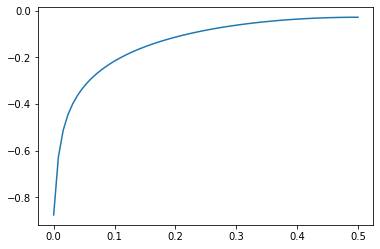

In [63]:
plt.plot(dx*np.arange(N//2+1),np.flip(phi.reshape(N,N)[N//2,:N//2+1]))

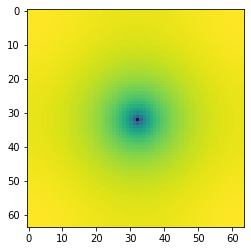

In [46]:
plt.imshow(phi.reshape(N,N))

In [41]:
phi.reshape(8,8), phi_test.reshape(8,8)

(array([[ 0.        , -0.00390625, -0.0140056 , -0.02543986, -0.03098739,
         -0.02543986, -0.0140056 , -0.00390625],
        [-0.00390625, -0.0086222 , -0.02115065, -0.03619573, -0.04434743,
         -0.03619573, -0.02115065, -0.0086222 ],
        [-0.0140056 , -0.02115065, -0.04140406, -0.06946998, -0.08963585,
         -0.06946998, -0.04140406, -0.02115065],
        [-0.02543986, -0.03619573, -0.06946998, -0.12626926, -0.19088104,
         -0.12626926, -0.06946998, -0.03619573],
        [-0.03098739, -0.04434743, -0.08963585, -0.19088104, -0.43697479,
         -0.19088104, -0.08963585, -0.04434743],
        [-0.02543986, -0.03619573, -0.06946998, -0.12626926, -0.19088104,
         -0.12626926, -0.06946998, -0.03619573],
        [-0.0140056 , -0.02115065, -0.04140406, -0.06946998, -0.08963585,
         -0.06946998, -0.04140406, -0.02115065],
        [-0.00390625, -0.0086222 , -0.02115065, -0.03619573, -0.04434743,
         -0.03619573, -0.02115065, -0.0086222 ]]),
 array([[ 0.  